In [109]:
%load_ext lab_black
# !pip install geopandas
import pandas as pd
import geopandas as gpd

pd.options.display.max_columns = 1000
pd.options.display.max_rows = 1000

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [110]:
# Import the data using geopandas' .read_file() method
gdf = gpd.read_file("./data/Upper_Floridan_Aquifer_Wells.csv")

In [111]:
# Use the .head() method to inspect the results
gdf.head(2)

,X,Y,OBJECTID,SITEID,SITENAME,AGENCY,OBSERVATIONTYPE,LATDD,LONGDD,HORIZONTALDATUM,TOTALDEPTH,CASEDDEPTH,COMMENTS,geometry
0,-81.8419709909263,27.5974387133633,1,579770,ROMP 41 AVPK PZ MONITOR,SWFWMD,Well,27.59743361,-81.84196778,,1401,828,,None
1,-81.7376087562021,28.1686191325505,2,17652,LAKE ALFRED DEEP NR LAKE ALFRED,SWFWMD,Well,28.16861389,-81.73760556,,425,102,,None


<AxesSubplot:>

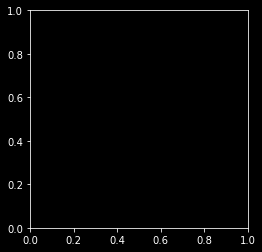

In [112]:
gdf.plot()

<AxesSubplot:>

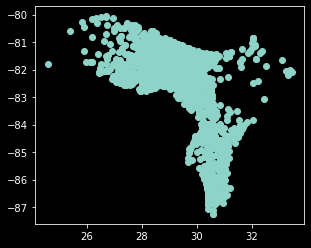

In [113]:
# Oh no! It's empty!
# Fix

gdf = gpd.GeoDataFrame(
    gdf,
    geometry=gpd.points_from_xy(gdf["Y"].astype(float), gdf["X"].astype(float)),
)
gdf.plot()

In [114]:
filtered = gdf[pd.to_numeric(gdf["TOTALDEPTH"], errors="coerce").notnull()]

In [115]:
# Filter/subset the geodataframe (only California counties, or only place with n numbers of residents, etc)
# Show me only wells with a depth deeper than the mean
depth_deeper = filtered[
    filtered["TOTALDEPTH"].astype(float) >= filtered["TOTALDEPTH"].astype(float).mean()
]
len(depth_deeper)

504

In [116]:
# Export your newly filtered geodataframe
depth_deeper.to_csv("./data/Upper_Floridan_Aquifer_Wells_deep.csv")